# <center>UGCA Project 2</center>
## <center>Sentiment Analysis of the 2018 Texas Senate Race</center>

<center><font size=2>Yuejia Feng, Ting-Yi Hung, Abhilasha Kanitkar, and Brian Peterson</font><center>
    <center><font size=2>10.21.18</font></center>

## Task A

### Parse Tweets

In [1]:
import json
import pandas as pd
import numpy as np
from dict_tools import find_key_in_dict

In [2]:
with open('NewConsolidatedTweetsData.json','r') as f:
#     print(sum([1 for i in f]))
    count = 1
    raw_tweets = dict()
    for line in f:
        if count:
            tweet = json.loads(line)
            tweet_specifics = find_key_in_dict(['full_text', 'location', 'text'], tweet)
            d = {}
            d['location'] = tweet_specifics['location']
            if 'full_text' in tweet_specifics.keys():
                d['text'] = tweet_specifics['full_text']
            else:
                d['text'] = tweet_specifics['text']
            raw_tweets[count] = d
        count += 1

In [3]:
raw_tweets

{1: {'location': 'Florida, USA',
  'text': '"Ted Cruz has insisted that we repeal every single word of the Affordable Care Act, including protections for pre-existing conditions. I want to expand medicaid."\n\n— Beto O\'Rourke talks differences between himself and Ted Cruz in the Texas Senate race. https://t.co/Ko7Y8ttM2I'},
 2: {'location': 'New York, N.Y.',
  'text': 'What the hell is wrong with Texas? Republicans have one of the smarmiest men ever as their candidate for Senate, Ted Cruz. Democrats have one of the best candidates in a lifetime, Beto O’Rourke. And yet Cruz is up by eight points.\n#Beto4Texas'},
 3: {'location': 'El Paso, TX',
  'text': '🛑Beto skates across the Stage on his skateboard. Hoping to show his “Cool Guy” side.  Cruz still leads in polling.Dont become complacent #Texas He’s raised $36 million to win. @realDonaldTrump https://t.co/dzlvM7GpIK🛑 https://t.co/MQQhmi076T'},
 4: {'location': None,
  'text': '"Ted Cruz has insisted that we repeal every single word of

In [4]:
len(raw_tweets)

9078

### Clean Tweets

In [5]:
import copy
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import brown
stopwords_set = set(stopwords.words('english'))
brown_set = set(brown.words())

In [6]:
tweets_cleaned = copy.deepcopy(raw_tweets)

In [7]:
characters_to_clean = r'?!,:,/\"-+=@#$%^&*()><{}[]|.' + r"'"

for tweet in tweets_cleaned:
    
    # clean the text
    for char in characters_to_clean:
        tweets_cleaned[tweet]['text'] = tweets_cleaned[tweet]['text'].replace(char, '')

    words = word_tokenize(tweets_cleaned[tweet]['text'].lower())
    cleaned_words = [word for word in words if word not in stopwords_set]
    cleaned_words1 = [word for word in cleaned_words if len(word)>2]
    
    tweets_cleaned[tweet]['text'] = ' '.join(cleaned_words1)
    
    #clean the location
    if tweets_cleaned[tweet]['location']:
        for char in characters_to_clean:
            tweets_cleaned[tweet]['location'] = tweets_cleaned[tweet]['location'].replace(char, '')
        tweets_cleaned[tweet]['location'] = tweets_cleaned[tweet]['location'].lower()        

In [8]:
tweets_cleaned

{1: {'location': 'florida usa',
  'text': 'ted cruz insisted repeal every single word affordable care act including protections preexisting conditions want expand medicaid beto orourke talks differences ted cruz texas senate race httpstcoko7y8ttm2i'},
 2: {'location': 'new york ny',
  'text': 'hell wrong texas republicans one smarmiest men ever candidate senate ted cruz democrats one best candidates lifetime beto rourke yet cruz eight points beto4texas'},
 3: {'location': 'el paso tx',
  'text': '🛑beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont become complacent texas raised million win realdonaldtrump httpstcodzlvm7gpik🛑 httpstcomqqhmi076t'},
 4: {'location': None,
  'text': 'ted cruz insisted repeal every single word affordable care act including protections preexisting conditions want expand medicaid beto orourke talks differences ted cruz texas senate race httpstcoko7y8ttm2i'},
 5: {'location': 'little blue speck of dust',
  'text': 'hell 

## Task B

### Tweet Statistics

In [9]:
from collections import Counter
import pprint
pp = pprint.PrettyPrinter(indent=2)

In [10]:
cnt = Counter()
for i in tweets_cleaned:
    cnt += Counter(word_tokenize(tweets_cleaned[i]['text']))

In [11]:
cnt.most_common(1000)

[('texas', 7882),
 ('senate', 7062),
 ('endorsed', 6633),
 ('beto', 6403),
 ('orourke', 4883),
 ('cruz', 4786),
 ('houston', 4603),
 ('chronicle', 4446),
 ('ted', 4403),
 ('betoorourke', 3686),
 ('vote', 3672),
 ('breaking', 3618),
 ('president', 3223),
 ('obama', 2750),
 ('newspaper', 2676),
 ('bush', 2676),
 ('george', 2670),
 ('romney', 2666),
 ('ran', 2652),
 ('httpstcobbzimtil8z', 2647),
 ('race', 2208),
 ('would', 954),
 ('one', 942),
 ('krassenstein', 910),
 ('trump', 879),
 ('republicans', 723),
 ('tedcruz', 717),
 ('texans', 699),
 ('endorses', 689),
 ('rourke', 688),
 ('thehill', 518),
 ('country', 458),
 ('border', 455),
 ('says', 445),
 ('candidate', 438),
 ('realdonaldtrump', 428),
 ('candidates', 426),
 ('years', 418),
 ('circus', 410),
 ('good', 398),
 ('teambeto', 393),
 ('say', 391),
 ('democrats', 389),
 ('httpstco2yx0ugcqec', 383),
 ('httpstcokfqhhmwwro', 383),
 ('wrong', 357),
 ('yes', 349),
 ('dem', 348),
 ('endorsing', 347),
 ('impeach', 344),
 ('points', 340),
 (

In [13]:
#Issues found 
#medicaid, people, security, terrorists, border, danger , protections ,attacks, education ,money, radical, thug, nonwhites, corrupt, attacks, healthcare, illegal, immigration, racist

## Task C

### Find and count tweets mentioning each issue

In [14]:
issues = {
    'healthcare': dict(),
    'job': dict(),
    'crime': dict(),
    'gun': dict(),
    'education' : dict(),
    'immigration' : dict(),
    'violence' : dict(),
    'racist': dict(),
    'money' : dict(),
    'corruption' : dict()
    }

In [15]:
issues_list = {
    'healthcare' : ['healthcare', 'health', 'medicaid'],
    'job' : ['job', 'jobs'],
    'crime' : ['crime', 'crimes'],
    'gun' : ['gun', 'guns'],
    'education' : ['education','schools'],
    'immigration' : ['immigration'],
    'violence' : ['violence'],
    'racist' : ['racist', 'racisim'],
    'money' : ['money'],
    'corruption' : ['corruption','corrupt']    
}


In [16]:
for i in tweets_cleaned:
    for j in word_tokenize(tweets_cleaned[i]['text']):
        if j in issues_list['healthcare']:
            issues['healthcare'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['job']:
            issues['job'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['education']:
            issues['education'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['crime']:
            issues['crime'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['gun']:
            issues['gun'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['immigration']:
            issues['immigration'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['violence']:
            issues['violence'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['racist']:
            issues['racist'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['money']:
            issues['money'][i] = tweets_cleaned[i]['text']
        elif j in issues_list['corruption']:
            issues['corruption'][i] = tweets_cleaned[i]['text']

pp.pprint(issues['crime'])

{ 32: 'lynching crime violence motivated racism federal crime bill senators '
      'booker scott change httpstcozpteqzkpmt'}


In [17]:
issues_mention_list = []
for i in issues:
    issues_mention_list.append( (i, len(issues[i])))
issues_mention_list.sort(key=lambda x: x[1], reverse=True)
# print(len(issues_mention_list))
for i in range(len(issues_mention_list)):
    print(str(i+1) + ") The issue '" + str(issues_mention_list[i][0],) + "' was mentioned " + str(issues_mention_list[i][1]) + ' times')
      

1) The issue 'immigration' was mentioned 185 times
2) The issue 'racist' was mentioned 185 times
3) The issue 'healthcare' was mentioned 117 times
4) The issue 'job' was mentioned 64 times
5) The issue 'money' was mentioned 32 times
6) The issue 'education' was mentioned 19 times
7) The issue 'corruption' was mentioned 14 times
8) The issue 'gun' was mentioned 6 times
9) The issue 'violence' was mentioned 3 times
10) The issue 'crime' was mentioned 1 times


### Find and count tweets mentioning each candidate 

In [18]:
candidates = {'beto':dict(), 'cruz':dict()}

for i in tweets_cleaned:
    for j in word_tokenize(tweets_cleaned[i]['text']):
        if j == 'beto' or j == "o'rourke" or j == "o'rourke" or j == "betoorourke":
            candidates['beto'][i] = tweets_cleaned[i]['text']
        elif j == 'cruz' or j == 'ted':
            candidates['cruz'][i] = tweets_cleaned[i]['text']

# pp.pprint(candidates)

In [19]:
candidates_mention_list = []
for i in candidates:
    candidates_mention_list.append( (i, len(candidates[i])))
candidates_mention_list.sort(key=lambda x: x[1], reverse=True)
# print(len(issues_mention_list))
for i in range(len(candidates_mention_list)):
    print(str(i+1) + ") The candidates '" + str(candidates_mention_list[i][0],) + "' was mentioned " + str(candidates_mention_list[i][1]) + ' times')
    

1) The candidates 'beto' was mentioned 7036 times
2) The candidates 'cruz' was mentioned 4479 times


### Find cross mentions

In [20]:
# init dictionary
cross_candidates_issues = dict()
for i in candidates:
    cross_candidates_issues[i] = dict()
    for j in issues:
        cross_candidates_issues[i][j] = dict()
    for j in candidates:
        cross_candidates_issues[i][j] = dict()
for i in issues:
    cross_candidates_issues[i] = dict()
    for j in issues:
        cross_candidates_issues[i][j] = dict()
    for j in candidates:
        cross_candidates_issues[i][j] = dict()
pp.pprint(cross_candidates_issues)

{ 'beto': { 'beto': {},
            'corruption': {},
            'crime': {},
            'cruz': {},
            'education': {},
            'gun': {},
            'healthcare': {},
            'immigration': {},
            'job': {},
            'money': {},
            'racist': {},
            'violence': {}},
  'corruption': { 'beto': {},
                  'corruption': {},
                  'crime': {},
                  'cruz': {},
                  'education': {},
                  'gun': {},
                  'healthcare': {},
                  'immigration': {},
                  'job': {},
                  'money': {},
                  'racist': {},
                  'violence': {}},
  'crime': { 'beto': {},
             'corruption': {},
             'crime': {},
             'cruz': {},
             'education': {},
             'gun': {},
             'healthcare': {},
             'immigration': {},
             'job': {},
             'money': {},
             'ra

In [21]:
for i in cross_candidates_issues:
    for j in cross_candidates_issues[i]:
        if i in candidates:
            tweets_mentioning1 = set(candidates[i].keys())
        elif i in issues:
            tweets_mentioning1 = set(issues[i].keys())
            
        if j in candidates:
            tweets_mentioning2 = set(candidates[j].keys())
        elif j in issues:
            tweets_mentioning2 = set(issues[j].keys())
            
        same_tweets = tweets_mentioning1.intersection(tweets_mentioning2)
        
        for k in same_tweets:
            cross_candidates_issues[i][j][k] = tweets_cleaned[k]['text']

In [22]:
cross_candidates_issues

{'beto': {'healthcare': {1: 'ted cruz insisted repeal every single word affordable care act including protections preexisting conditions want expand medicaid beto orourke talks differences ted cruz texas senate race httpstcoko7y8ttm2i',
   4: 'ted cruz insisted repeal every single word affordable care act including protections preexisting conditions want expand medicaid beto orourke talks differences ted cruz texas senate race httpstcoko7y8ttm2i',
   6: 'ted cruz insisted repeal every single word affordable care act including protections preexisting conditions want expand medicaid beto orourke talks differences ted cruz texas senate race httpstcoko7y8ttm2i',
   16: 'ted cruz insisted repeal every single word affordable care act including protections preexisting conditions want expand medicaid beto orourke talks differences ted cruz texas senate race httpstcoko7y8ttm2i',
   534: 'ted cruz insisted repeal every single word affordable care act including protections preexisting conditions 

In [23]:
sorted_keys = sorted(cross_candidates_issues.keys()) 
count_matrix = []
for i in sorted_keys:
    row = []
    for j in sorted_keys:
        row.append(len(cross_candidates_issues[i][j]))
    count_matrix.append(row)

In [24]:
#shows the counts of each tweet
df_count_matrix = pd.DataFrame(count_matrix, columns=sorted_keys, index=sorted_keys)
df_count_matrix

,beto,corruption,crime,cruz,education,gun,healthcare,immigration,job,money,racist,violence
beto,7036,10,0,3828,7,6,112,6,45,27,2,1
corruption,10,14,0,2,0,0,0,0,4,1,0,0
crime,0,0,1,0,0,0,0,0,0,0,0,1
cruz,3828,2,0,4479,0,1,99,1,45,8,1,0
education,7,0,0,0,19,0,6,6,6,0,0,0
gun,6,0,0,1,0,6,0,0,0,0,0,1
healthcare,112,0,0,99,6,0,117,7,8,0,0,0
immigration,6,0,0,1,6,0,7,185,6,0,177,0
job,45,4,0,45,6,0,8,6,64,0,0,0
money,27,1,0,8,0,0,0,0,0,32,0,0


### Calculate Lift

In [25]:
sorted_keys = sorted(cross_candidates_issues.keys())
num_total_tweets = len(tweets_cleaned.keys())

lift_matrix = []
for i in sorted_keys:
    row = []
    
    if i in issues:
        mention1 = len(issues[i])
    elif i in candidates:
        mention1 = len(candidates[i])    
    
    for j in sorted_keys:
        
        mention_both = len(cross_candidates_issues[i][j])
        
        if j in issues:
            mention2 = len(issues[j])
        elif j in candidates:
            mention2 = len(candidates[j])
            
#         print( mention_both, mention1, mention2, num_total_tweets)
        row.append(
            round( num_total_tweets * mention_both / (mention1 * mention2), 4)
                  ) 
    lift_matrix.append(row)

In [26]:
df_lift_matrix = pd.DataFrame(lift_matrix, columns=sorted_keys, index=sorted_keys)
df_lift_matrix

,beto,corruption,crime,cruz,education,gun,healthcare,immigration,job,money,racist,violence
beto,1.2902,0.9216,0.0,1.1027,0.4753,1.2902,1.2351,0.0418,0.9072,1.0886,0.0139,0.4301
corruption,0.9216,648.4286,0.0,0.2895,0.0000,0.0000,0.0000,0.0000,40.5268,20.2634,0.0000,0.0000
crime,0.0000,0.0000,9078.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3026.0000
cruz,1.1027,0.2895,0.0,2.0268,0.0000,0.3378,1.7150,0.0110,1.4251,0.5067,0.0110,0.0000
education,0.4753,0.0000,0.0,0.0000,477.7895,0.0000,24.5020,15.4959,44.7928,0.0000,0.0000,0.0000
gun,1.2902,0.0000,0.0,0.3378,0.0000,1513.0000,0.0000,0.0000,0.0000,0.0000,0.0000,504.3333
healthcare,1.2351,0.0000,0.0,1.7150,24.5020,0.0000,77.5897,2.9358,9.6987,0.0000,0.0000,0.0000
immigration,0.0418,0.0000,0.0,0.0110,15.4959,0.0000,2.9358,49.0703,4.6003,0.0000,46.9483,0.0000
job,0.9072,40.5268,0.0,1.4251,44.7928,0.0000,9.6987,4.6003,141.8438,0.0000,0.0000,0.0000
money,1.0886,20.2634,0.0,0.5067,0.0000,0.0000,0.0000,0.0000,0.0000,283.6875,0.0000,0.0000


### Calculate Sentiment

In [27]:
df_lift_mask = df_lift_matrix.apply(lambda x: [i>1 for i in x])

In [28]:
beto_lift_one = df_lift_matrix[df_lift_mask][['beto']].drop(['beto','cruz'], axis=0).dropna()

In [29]:
cruz_lift_one = df_lift_matrix[df_lift_mask][['cruz']].drop(['beto','cruz'], axis=0).dropna()

In [30]:
beto_issues = beto_lift_one.index.tolist()
cruz_issues = cruz_lift_one.index.tolist()

In [31]:
for i in beto_issues:
    print(i,':',list(cross_candidates_issues['beto'][i].keys()))

gun : [44, 8506, 8592, 502, 279, 8826]
healthcare : [1, 4, 6, 16, 534, 28, 1565, 29, 33, 36, 40, 552, 556, 45, 52, 564, 62, 67, 581, 79, 80, 81, 87, 602, 92, 7776, 610, 103, 110, 113, 628, 629, 120, 128, 644, 660, 661, 151, 5272, 156, 157, 4772, 171, 684, 174, 687, 693, 694, 187, 6335, 198, 201, 716, 8396, 724, 228, 232, 746, 754, 252, 768, 7431, 282, 4379, 285, 286, 812, 302, 8497, 818, 309, 4925, 7498, 336, 343, 347, 869, 359, 7530, 368, 372, 890, 893, 387, 404, 412, 414, 415, 7588, 6061, 430, 431, 943, 435, 437, 438, 8119, 954, 955, 958, 451, 6597, 966, 455, 457, 7626, 470, 982, 472, 476, 496, 507]
money : [640, 1030, 8710, 8968, 398, 400, 8992, 177, 8759, 443, 326, 5832, 5450, 844, 845, 463, 212, 8023, 616, 1005, 7661, 367, 240, 7409, 2675, 504, 381]


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def cal_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['compound']

In [33]:
from nltk import ngrams
def get_radius_list(sentence,str1):
#     sentence = 'new poll finds beto trailing 5but leading cruz by 60 points among12 voters who say health care is their top issue this is why beto 014has gone all in on xxdefendingxx obamacare and calling for medicaid expansion'
    long = len(sentence.split())
    # limit = int(((long-n)/n)+n)
    n = 13
    limit = long-(n-1) # word long = 37 , pick 12 words every time. 25th time is the last time.
    
    sixgrams = ngrams(sentence.split(), n)
    count= 1
    temp = []
#     str1 = 'expansion'

    for grams in sixgrams:
        if count == 1:
            if grams[0] == str1:
                c = ' '.join(grams)
                temp.append(c)
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count == 2:
            if grams[0] == str1:
                c = ' '.join(grams)
                temp.append(c)
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count == 3:
            if grams[0] == str1:
                c = ' '.join(grams)
                temp.append(c)
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count == 4:
            if grams[0] == str1:
                c = ' '.join(grams)
                temp.append(c)
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count == 5:
            if grams[0] == str1:
                c = ' '.join(grams)
                temp.append(c)
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count == 6:
            if grams[0] == str1:
                c = ' '.join(grams)
                temp.append(c)
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count == 7:
            if grams[0] == str1:
                c = ' '.join(grams)
                temp.append(c)
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count < limit:
            if grams[6] == str1:
                c = ' '.join(grams)
                temp.append(c)
        elif count == limit:
            for i in range(6,13):
                if grams[i] == str1:
                    c = ' '.join(grams)
                    temp.append(c)
        count += 1
    return temp

In [34]:
cross_lift_score = {'beto':dict(), 'cruz':dict()}

In [37]:
total = 0
for j in cross_candidates_issues['beto']:
    i = 'beto'
    if j in beto_issues:
        for k in cross_candidates_issues[i][j]:
            for w in word_tokenize(cross_candidates_issues[i][j][k]):
#                 for w in word_tokenize(cross_lift_high1[i][j][k]):
                if w in issues_list[j]:
                    for l in get_radius_list(cross_candidates_issues[i][j][k],w):
                        total += cal_sentiment_scores(l)
                        avg = total/len(cross_candidates_issues[i][j][k])
                        cross_lift_score[i][j]=avg
for j in cross_candidates_issues['beto']:
    i = 'cruz'
    if j in cruz_issues:
        for k in cross_candidates_issues[i][j]:
            for w in word_tokenize(cross_candidates_issues[i][j][k]):
#                 for w in word_tokenize(cross_lift_high1[i][j][k]):
                if w in issues_list[j]:
                    for l in get_radius_list(cross_candidates_issues[i][j][k],w):
                        total += cal_sentiment_scores(l)
                        avg = total/len(cross_candidates_issues[i][j][k])
                        cross_lift_score[i][j]=avg

In [38]:
cross_lift_score

{'beto': {'healthcare': 0.16451317073170688,
  'gun': 0.17244723618090402,
  'money': 0.2057121546961321},
 'cruz': {'healthcare': 0.37224487804877926, 'job': 0.4053328282828271}}

In [39]:
beto_sentiment_scores_df = []
cruz_sentiment_scores_df = []

for i in cross_lift_score:
    if i == 'beto':
        for j in beto_issues:
            beto_sentiment_scores_df.append(cross_lift_score[i][j])
    elif i == 'cruz':
        for j in cruz_issues:
            cruz_sentiment_scores_df.append(cross_lift_score[i][j])
            
beto_sentiment_scores_df = pd.DataFrame(beto_sentiment_scores_df, index=beto_issues, columns=["beto"])
cruz_sentiment_scores_df = pd.DataFrame(cruz_sentiment_scores_df, index=cruz_issues, columns=["cruz"])

In [40]:
cruz_sentiment_scores_df

,cruz
healthcare,0.372245
job,0.405333


In [41]:
beto_sentiment_scores_df

,beto
gun,0.172447
healthcare,0.164513
money,0.205712


## Task D

### MDS

In [42]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
mds = MDS()

In [44]:
disimilarity_matrix = df_lift_matrix.apply(lambda x: 1/x)

In [45]:
beto_disimilarity_matrix = disimilarity_matrix.drop(['cruz'], axis=1)
beto_disimilarity_matrix = beto_disimilarity_matrix.drop(['cruz'], axis=0)
beto_disimilarity_matrix = beto_disimilarity_matrix.replace([np.inf, -np.inf], np.nan).dropna(subset=['beto'], axis=1, how="all")
beto_disimilarity_matrix.drop('immigration', axis=0, inplace=True)
beto_disimilarity_matrix.drop('immigration', axis=1, inplace=True)
beto_disimilarity_matrix.drop('racist', axis=0, inplace=True)
beto_disimilarity_matrix.drop('racist', axis=1, inplace=True)
beto_disimilarity_series = np.array(beto_disimilarity_matrix.loc['beto']).reshape(-1,1)
#beto_disimilarity_series

In [46]:
cruz_disimilarity_matrix = disimilarity_matrix.drop(['beto'], axis=1)
cruz_disimilarity_matrix = cruz_disimilarity_matrix.drop(['beto'], axis=0)
cruz_disimilarity_matrix = cruz_disimilarity_matrix.replace([np.inf, -np.inf], np.nan).dropna(subset=['cruz'], axis=1, how="all")
cruz_disimilarity_matrix.drop('immigration', axis=0, inplace=True)
cruz_disimilarity_matrix.drop('immigration', axis=1, inplace=True)
cruz_disimilarity_matrix.drop('racist', axis=0, inplace=True)
cruz_disimilarity_matrix.drop('racist', axis=1, inplace=True)
cruz_disimilarity_series = np.array(cruz_disimilarity_matrix.loc['cruz']).reshape(-1,1)
#cruz_disimilarity_series

In [47]:
beto_mds_coordinates = pd.DataFrame(mds.fit_transform(beto_disimilarity_series)) 
cruz_mds_coordinates = pd.DataFrame(mds.fit_transform(cruz_disimilarity_series)) 

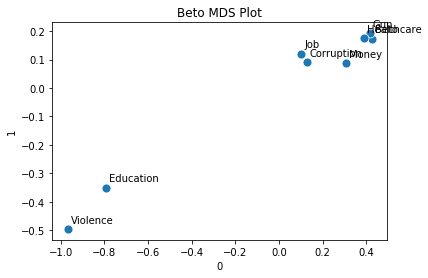

In [48]:
sns.scatterplot(beto_mds_coordinates[0], beto_mds_coordinates[1], s=80)
plt.title("Beto MDS Plot")

labels = []
for i in beto_disimilarity_matrix:
    labels.append(i)

# https://stackoverflow.com/questions/5147112/how-to-put-individual-tags-for-a-scatter-plot
for label, x, y in zip(labels, beto_mds_coordinates[0], beto_mds_coordinates[1]):
    plt.annotate(
        label.title(),
        xy=(x, y), xytext=(3, 4),
        textcoords='offset points', ha='left', va='bottom',
    )
plt.show()

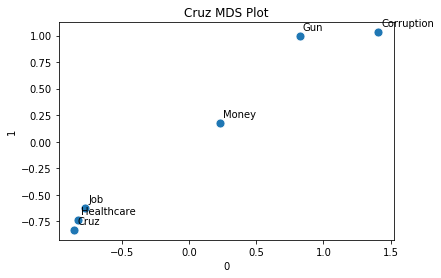

In [49]:
sns.scatterplot(cruz_mds_coordinates[0], cruz_mds_coordinates[1], s=80)
plt.title("Cruz MDS Plot")

labels = []
for i in cruz_disimilarity_matrix:
    labels.append(i)

# https://stackoverflow.com/questions/5147112/how-to-put-individual-tags-for-a-scatter-plot
for label, x, y in zip(labels, cruz_mds_coordinates[0], cruz_mds_coordinates[1]):
    plt.annotate(
        label.title(),
        xy=(x, y), xytext=(3, 4),
        textcoords='offset points', ha='left', va='bottom',
    )
plt.show()

## Task E

### Lift Values

In [50]:
def find_key_in_dict(keys_i_want, dictionary):
    l = []
    def iterate_through_dict(keys_i_want, dictionary):
        for i in dictionary:
            if i in keys_i_want:
                l.append({i: dictionary[i]})
                keys_i_want.remove(i)
            if type(dictionary[i]) is dict:
                iterate_through_dict(keys_i_want, dictionary[i])
    iterate_through_dict(keys_i_want,dictionary)            
    return l

In [51]:
with open('NewConsolidatedTweetsData.json','r') as f:
#     print(sum([1 for i in f]))
    comments_list =[]
    #big_city = ['Dallas', 'Houston', 'San Antonio', 'Austin', 'El Paso']
    count = 1
    for line in f:
        tweet = json.loads(line)
        if count <= 4000:
            l = find_key_in_dict(['full_text', 'location', 'text'], tweet)
            d = {}
            for i in range(len(l)):
                for j in l[i]:
                    if j == 'location':
                        d['location'] = l[i][j]
                        break
                for j in l[i]:
                    if j == 'full_text':
                        d['text'] = l[i][j]
                        break
                if 'text' not in d.keys():
                    for j in l[i]:
                        if j == 'text':
                            d['text'] = l[i][j]
                            break
            comments_list.append(d)
#             print(count,d)
#             print()
        count += 1
    
comments_list

[{'text': '"Ted Cruz has insisted that we repeal every single word of the Affordable Care Act, including protections for pre-existing conditions. I want to expand medicaid."\n\n— Beto O\'Rourke talks differences between himself and Ted Cruz in the Texas Senate race. https://t.co/Ko7Y8ttM2I',
  'location': 'Florida, USA'},
 {'text': 'What the hell is wrong with Texas? Republicans have one of the smarmiest men ever as their candidate for Senate, Ted Cruz. Democrats have one of the best candidates in a lifetime, Beto O’Rourke. And yet Cruz is up by eight points.\n#Beto4Texas',
  'location': 'New York, N.Y.'},
 {'text': '🛑Beto skates across the Stage on his skateboard. Hoping to show his “Cool Guy” side.  Cruz still leads in polling.Dont become complacent #Texas He’s raised $36 million to win. @realDonaldTrump https://t.co/dzlvM7GpIK🛑 https://t.co/MQQhmi076T',
  'location': 'El Paso, TX'},
 {'text': '"Ted Cruz has insisted that we repeal every single word of the Affordable Care Act, includ

__Replace 10 biggest cities by population (e.g., Dallas, Houston, San Antonio, Austin, El Paso, etc.) with big_city and the rest with small_town. Then merge the location and the text columns. __

In [52]:
big_city = ['Dallas', 'Houston', 'San Antonio', 'Austin', 'El Paso','Fort Worth','Arlington','Corpus Christi','Plano','Laredo']
comments = []
for i in comments_list:
    m =str(i['text'])
    l = str(i['location']).split(",")[0]
    if l in big_city:
        l = "big_city"
    else:
         l = "small_town"
    comments.append(l+' '+m)
          

len(comments )


4000

In [53]:
comments=list(map(lambda x: x.lower(), comments))
comments

['small_town "ted cruz has insisted that we repeal every single word of the affordable care act, including protections for pre-existing conditions. i want to expand medicaid."\n\n— beto o\'rourke talks differences between himself and ted cruz in the texas senate race. https://t.co/ko7y8ttm2i',
 'small_town what the hell is wrong with texas? republicans have one of the smarmiest men ever as their candidate for senate, ted cruz. democrats have one of the best candidates in a lifetime, beto o’rourke. and yet cruz is up by eight points.\n#beto4texas',
 'big_city 🛑beto skates across the stage on his skateboard. hoping to show his “cool guy” side.  cruz still leads in polling.dont become complacent #texas he’s raised $36 million to win. @realdonaldtrump https://t.co/dzlvm7gpik🛑 https://t.co/mqqhmi076t',
 'small_town "ted cruz has insisted that we repeal every single word of the affordable care act, including protections for pre-existing conditions. i want to expand medicaid."\n\n— beto o\'ro

## 2. Calculate the lift value

In [54]:
# Number of each type of city mentioned in the tweets
city = {'big_city', 'small_town'}
city_mention = dict()

#initialize counter
for i in city:
    city_mention[i] = []
    
for i in city:
    for j in comments:
        for k in word_tokenize(j):
            if k == i:
                city_mention[i].append(k)
            break
    
    print(i + " was totally mentioned "+str(len(city_mention[i]))+" times.")

#print(city_mention)

big_city was totally mentioned 189 times.
small_town was totally mentioned 3811 times.


In [55]:
#Number of each name mentioned in the tweets
name = {'beto':['beto', 'betoorourke','@betoorourke'], 'cruz':['cruz','tedcruz','@tedcruz' ]}
name_mention = dict()


#initialize counter
for i in name:
    name_mention[i] = []
    
    
for i in name:
    for m in name[i]:
        for j in comments:
             for k in word_tokenize(j):
                     if k == m:
                            name_mention[i].append(j)
                            break                    
    print(i + " was totally mentioned "+str(len(name_mention[i]))+" times.")

beto was totally mentioned 4803 times.
cruz was totally mentioned 2486 times.


In [56]:
# Number of tweets containing each pair of city type and name
#(big_city, beto),(big_city, cruz),(small_town, beto),(small_town,, cruz)

# for each city type mentioned, find number of times each of name was also mentioned
cross_mention = dict()

# init dictionary
for i in city_mention:
    cross_mention[i] = dict()
    for j in name_mention:
        cross_mention[i][j] = [ ]
#{'big_city': {'beto': [], 'cruz': []}, 'small_town': {'beto': [], 'cruz': []}}

for i in city:
    for j in name_mention:
        for k in range(len(name_mention[j])):
            for l in word_tokenize(name_mention[j][k]):
                if l == i:
                    cross_mention[i][j].append( name_mention[j][k])
                    break
        print("Pair "+"("+i+","+j+")" + " was totally mentioned "+str(len(cross_mention[i][j]))+" times.")




Pair (big_city,beto) was totally mentioned 237 times.
Pair (big_city,cruz) was totally mentioned 118 times.
Pair (small_town,beto) was totally mentioned 4566 times.
Pair (small_town,cruz) was totally mentioned 2368 times.


In [57]:
N = len(comments)
N

4000

In [58]:
# now we can calculate the lift value
lift = [ ]

for i in range(len(city_mention.keys())):
    row = []
    for j in range(len(name_mention.keys())):
        row.append( round(N*len(cross_mention[list(city_mention.keys())[i]][list(name_mention.keys())[j]])/((len(city_mention[list(city_mention.keys())[i]]))*(len(name_mention[list(name_mention.keys())[j]]))), 4))

    lift.append(row)
lift

[[1.0443, 1.0046], [0.9978, 0.9998]]

In [59]:
lift_chart = pd.DataFrame(lift, columns=name_mention.keys(), index=city_mention.keys())
lift_chart

,beto,cruz
big_city,1.0443,1.0046
small_town,0.9978,0.9998


## 3. Calculate sentiment score

In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [61]:
def cal_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['compound']

In [62]:
#calculate sentiment score
score = []

#For each combination of each city type and each name(beto or cruz), 
#firstly calculate the sentiment score of each sentence of the combination, then calculate the average of the scores
#as the final sentiment score ot this combination

for i in list(city_mention.keys()):
    row=[]
    for j in list(name_mention.keys()):
        a=0
        for k in cross_mention[i][j]:
             a+=cal_sentiment_scores(k)
        row.append(round(a/len(cross_mention[i][j]),4))
    score.append(row)
            
score
        

[[0.3589, 0.2451], [0.3323, 0.2806]]

In [63]:
sentiment_score_chart = pd.DataFrame(score, columns=name_mention.keys(), index=city_mention.keys())
sentiment_score_chart

,beto,cruz
big_city,0.3589,0.2451
small_town,0.3323,0.2806


## Task F

<h4>What advice would you give to each of the two candidates based on your analyses in C, D and E above?</h4>

From the MDS graph for each candidate, we can see the how much the general population associates each issue with each candidate. For example, for Beto O'Rourke, we can see the topics of healthcare, jobs, and money (likely due to his immpressive fundraising campaign) are associated with him. For Ted Cruz, we see jobs and healthcare.

An investigation into the sentiment leads us to believe that, surprisingly, all the topic associations were positive. At this point, my advice to each candidate is to differentiate your message. Both are positively viewed for healthcare and jobs, so it's hardly a differentiating fact.

When we break Texas into big cities and small towns, we see something counter intuitive. While both candidates are mentioned equally, Beto is viewed more favorably than Cruz in small towns. It is very unusual for a liberal candidate to upstage the conservative candidate in small town Texas.

That being said, we don't advise anyone to act upon our insights. Our analysis was over a small dataset of streaming twitter data. We noticed our data was heavily influenced by retweets. Also, our team felt that because Beto has a strong influence over the millenials and millenials tend to be active on social media, that the online results will show bias for Beto supporters.